# Step by Step Tensors

#### Load Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Initialise Seeds

In [3]:
np.random.seed(42)
tf.set_random_seed(42)

#### Create a Dataset

In [8]:
xs = [0., 1., 2., 3., 4., 5., 6., 7.] #features
ys = [-.82, -.94, -.12, .26, .39, .64, 1.02, 1.0]

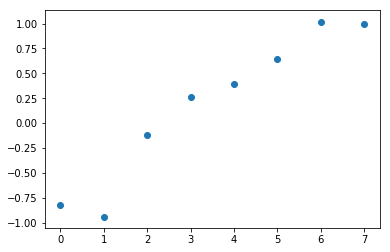

In [9]:
fig, ax = plt.subplots()
_ = ax.scatter(xs, ys)

#### Define Variables

In [7]:
m = tf.Variable(-0.5) # one example
b = tf.Variable(1.0) # bias

#### Define Cost Function (sqrd error)

In [10]:
total_error = 0
for x, y in zip(xs, ys):
    y_model = m * x + b
    total_error += (y - y_model) ** 2

#### Define Optimiser

In [13]:
optimizer_op = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(total_error)

#### Define Initialiser

In [14]:
initializer_op = tf.global_variables_initializer()

#### Execute Session

In [17]:
with tf.Session() as session:
    session.run(initializer_op)
    
    n_epochs = 1000
    for i in range(n_epochs):
        session.run(optimizer_op)
    
    slope, intercept = session.run([m, b])

In [18]:
slope

0.29314372

In [19]:
intercept

-0.84175235

In [20]:
y_hat = slope + intercept * np.array(xs)

In [21]:
y_hat

array([ 0.29314372, -0.54860863, -1.39036098, -2.23211333, -3.07386568,
       -3.91561803, -4.75737038, -5.59912273])

In [23]:
pd.DataFrame(list(zip(ys, y_hat)), columns = ["y", "y_hat"])

,y,y_hat
0,-0.82,0.293144
1,-0.94,-0.548609
2,-0.12,-1.390361
3,0.26,-2.232113
4,0.39,-3.073866
5,0.64,-3.915618
6,1.02,-4.757370
7,1.00,-5.599123


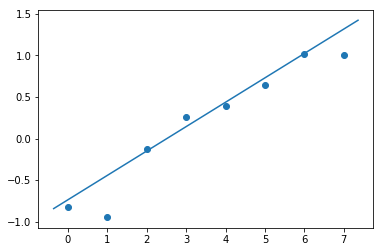

In [26]:
fig, ax = plt.subplots()
ax.scatter(xs, ys)
x_min, x_max = ax.get_xlim()
y_min, y_max = intercept, intercept + slope * (x_max - x_min)
ax.plot([x_min, x_max], [y_min, y_max])